# CS 4820
# Assignment 4: Data Pre-processing and Model Analysis

# Due: 2:00pm October 2, 2019

The [Pima Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for 614 women age 21 and above of Pima indian origins. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last column is the outcome, and it is a binary variable.

In this assignment, you are asked to build an ANN model to do the diabetes prediction. 

### 0. The *diabetes* Dataset and Data Preprocessing


In [6]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# data frame
df = pd.read_csv('data/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# set X and y
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [8]:
from sklearn.preprocessing import StandardScaler

# feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X[:3,:]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [9]:
from sklearn.model_selection import train_test_split

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)
X_train.shape
y_train.shape

(614, 8)

(614,)

### 1. Binary-Classification Model


In [21]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, validation_split=0.1, batch_size = 4, epochs = 100, verbose=2)

Train on 552 samples, validate on 62 samples
Epoch 1/100
552/552 - 0s - loss: 0.6526 - accuracy: 0.6558 - val_loss: 0.5909 - val_accuracy: 0.5968
Epoch 2/100
552/552 - 0s - loss: 0.5259 - accuracy: 0.6576 - val_loss: 0.5669 - val_accuracy: 0.5968
Epoch 3/100
552/552 - 0s - loss: 0.5115 - accuracy: 0.6576 - val_loss: 0.5613 - val_accuracy: 0.5968
Epoch 4/100
552/552 - 0s - loss: 0.5076 - accuracy: 0.7681 - val_loss: 0.5570 - val_accuracy: 0.7419
Epoch 5/100
552/552 - 0s - loss: 0.5032 - accuracy: 0.7808 - val_loss: 0.5555 - val_accuracy: 0.7581
Epoch 6/100
552/552 - 0s - loss: 0.4998 - accuracy: 0.7862 - val_loss: 0.5513 - val_accuracy: 0.7419
Epoch 7/100
552/552 - 0s - loss: 0.4974 - accuracy: 0.7790 - val_loss: 0.5494 - val_accuracy: 0.7419
Epoch 8/100
552/552 - 0s - loss: 0.4949 - accuracy: 0.7808 - val_loss: 0.5488 - val_accuracy: 0.7419
Epoch 9/100
552/552 - 0s - loss: 0.4912 - accuracy: 0.7844 - val_loss: 0.5472 - val_accuracy: 0.7742
Epoch 10/100
552/552 - 0s - loss: 0.4897 - acc

Epoch 81/100
552/552 - 0s - loss: 0.4130 - accuracy: 0.8080 - val_loss: 0.5626 - val_accuracy: 0.7419
Epoch 82/100
552/552 - 0s - loss: 0.4138 - accuracy: 0.8134 - val_loss: 0.5671 - val_accuracy: 0.7419
Epoch 83/100
552/552 - 0s - loss: 0.4126 - accuracy: 0.8207 - val_loss: 0.5653 - val_accuracy: 0.7419
Epoch 84/100
552/552 - 0s - loss: 0.4112 - accuracy: 0.8152 - val_loss: 0.5665 - val_accuracy: 0.7419
Epoch 85/100
552/552 - 0s - loss: 0.4112 - accuracy: 0.8243 - val_loss: 0.5667 - val_accuracy: 0.7258
Epoch 86/100
552/552 - 0s - loss: 0.4118 - accuracy: 0.8261 - val_loss: 0.5705 - val_accuracy: 0.7419
Epoch 87/100
552/552 - 0s - loss: 0.4104 - accuracy: 0.8188 - val_loss: 0.5709 - val_accuracy: 0.7419
Epoch 88/100
552/552 - 0s - loss: 0.4083 - accuracy: 0.8080 - val_loss: 0.5712 - val_accuracy: 0.7258
Epoch 89/100
552/552 - 0s - loss: 0.4084 - accuracy: 0.8207 - val_loss: 0.5684 - val_accuracy: 0.7258
Epoch 90/100
552/552 - 0s - loss: 0.4060 - accuracy: 0.8207 - val_loss: 0.5725 - v

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

### 2. Analysis

In [24]:
from sklearn.metrics import classification_report

# print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.80      0.76      0.78        54

   micro avg       0.85      0.85      0.85       154
   macro avg       0.84      0.83      0.83       154
weighted avg       0.85      0.85      0.85       154



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,90,10
1,13,41


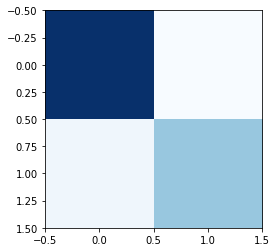

In [27]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues');

In [29]:
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test, y_pred)*100, 2),'%')

Test accuracy for our ANN model: 85.06 %
